In [2]:
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
dados = pd.read_csv("data/vgsales.csv", encoding="latin1")

In [20]:
dados.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,clusters
0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,4
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,4


In [17]:
# model = KMeans(n_clusters=3)
# model.fit(dados.EU_Sales)
del dados["Rank"]
del dados["Year"]
data_array = dados[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)
dados["clusters"] = kmeans.fit_predict(data_array)

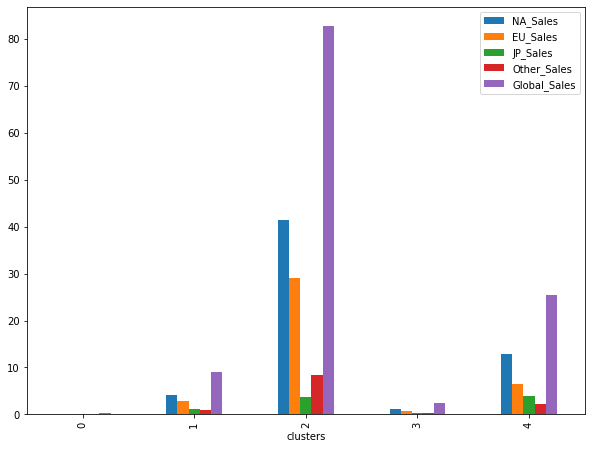

In [18]:
dados.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))